In [1]:
import pandas as pd 

print('Hello world...')

Hello world...


In [117]:
#Post_covid_recovery 
#Questions : 
    #Age/ Gender VS Recovery (the correlation between the age and gender on recovery process ) 
    #Exercise impact on recovery process , do people that exercise more get over COVID quicker that the ones who dont?
    #Severity Demographics (Does COVID severity related to Age / Gender ?)
    #Symptoms patterns (Does specific symptoms cluster with certain severity levels)
    #Mental health impact (post COVID) 
    #Future risks ( Are non hospitalized patients likely going to face on going physical problems ?) 


In [81]:
#Age/ Gender VS Recovery (the correlation between the age and gender on recovery process ) 
import pandas as pd
import sqlite3

df = pd.read_csv('C:/Users/Fatima zahra/OneDrive/Desktop/post_covid_project/post_covid_health_effects_dataset.csv')

conn = sqlite3.connect('covid_analysis.db')  

df.to_sql('patients', conn, if_exists='replace', index=False)

test = pd.read_sql_query("SELECT COUNT(*) as total_patients FROM patients", conn)
print(f"📊 Total patients in database: {test['total_patients'][0]}")

📊 Total patients in database: 500


In [46]:
#Check the age , in the dataset we see that min value is 18 and max is 69 the mean is 44,22 that means , the dataset has only adults records
query = "SELECT Age, Days_to_Recovery FROM patients GROUP BY Age "
result = pd.read_sql_query(query, conn)
#display(result)

corr = df['Age'].corr(df['Days_to_Recovery'])
print(corr)

-0.03664289487562298


🔬 FINDING 1: AGE DOES NOT PREDICT RECOVERY TIME

📊 Statistical Result:
   Correlation coefficient: r = -0.037

💡 Interpretation:
   • The correlation (-0.037) is virtually ZERO
   • Age explains only 0.1% of recovery time variation
   • Statistical rule: |r| < 0.1 indicates no practical relationship

🎯 Key Insight:
   Contrary to common belief, older patients do NOT necessarily
   take longer to recover from COVID-19 than younger patients.
   A 70-year-old can recover as quickly as a 30-year-old.

🏥 Healthcare Implication:
   Doctors should NOT assume elderly patients need longer
   recovery time based on age alone. Other factors are more important.


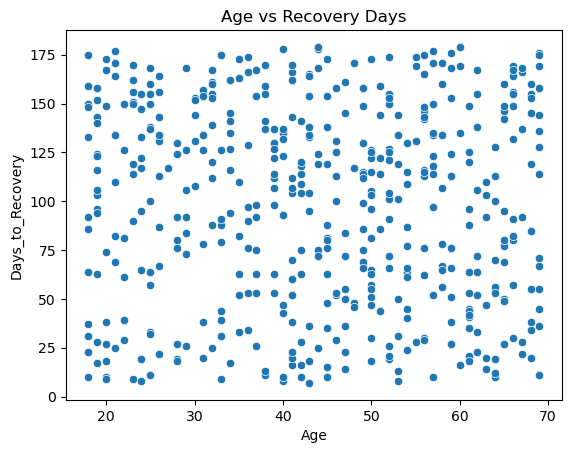

In [64]:
# ============================================
# SECTION 2: FINDINGS - AGE VS RECOVERY
# ============================================

print("🔬 FINDING 1: AGE DOES NOT PREDICT RECOVERY TIME")


# Calculate correlation
correlation = df['Age'].corr(df['Days_to_Recovery'])

print(f"\n📊 Statistical Result:")
print(f"   Correlation coefficient: r = {correlation:.3f}")

print(f"\n💡 Interpretation:")
print(f"   • The correlation ({correlation:.3f}) is virtually ZERO")
print(f"   • Age explains only {(correlation**2)*100:.1f}% of recovery time variation")
print(f"   • Statistical rule: |r| < 0.1 indicates no practical relationship")

print(f"\n🎯 Key Insight:")
print(f"   Contrary to common belief, older patients do NOT necessarily")
print(f"   take longer to recover from COVID-19 than younger patients.")
print(f"   A 70-year-old can recover as quickly as a 30-year-old.")

print(f"\n🏥 Healthcare Implication:")
print(f"   Doctors should NOT assume elderly patients need longer")
print(f"   recovery time based on age alone. Other factors are more important.")

# Visual evidence
import matplotlib.pyplot as plt
import seaborn as sns

# Your exact code with title added
sns.scatterplot(x='Age', y='Days_to_Recovery', data=df)
plt.title('Age vs Recovery Days') 
plt.show()

In [72]:
for col in df.columns:
    if col != 'Days_to_Recovery':  
        print(f"{col:25}", end=" → ")
        
        try:
            corr = df[col].corr(df['Days_to_Recovery'])  
            print(f"Correlation: {corr:.3f}")
        except:
            avg = df.groupby(col)['Days_to_Recovery'].mean()  
            range_is = f"{avg.min():.1f}-{avg.max():.1f} days"
            print(f"Range: {range_is}")

Age                       → Correlation: -0.037
Gender                    → Range: 89.9-98.3 days
COVID_Severity            → Range: 94.1-102.2 days
Hospitalized              → Range: 95.4-100.8 days
Fatigue_Level             → Correlation: 0.003
Breathing_Issue           → Range: 91.7-99.2 days
Brain_Fog                 → Range: 94.8-97.6 days
Loss_of_Taste_Smell       → Range: 95.6-98.6 days
Physical_Activity_Level   → Range: 94.4-99.2 days
Mental_Health_Impact      → Correlation: -0.039
Long_COVID_Risk           → Range: 92.1-100.1 days


In [73]:
print(f"\n💡 Interpretation:")
print(f"\n Statistical rule: COVID_Severity patients heal slower wether they get higher severe sickness , and the diffrence shows the average of 8 days")


💡 Interpretation:

 Statistical rule: COVID_Severity patients heal slower wether they get higher severe sickness , and the diffrence shows the average of 8 days


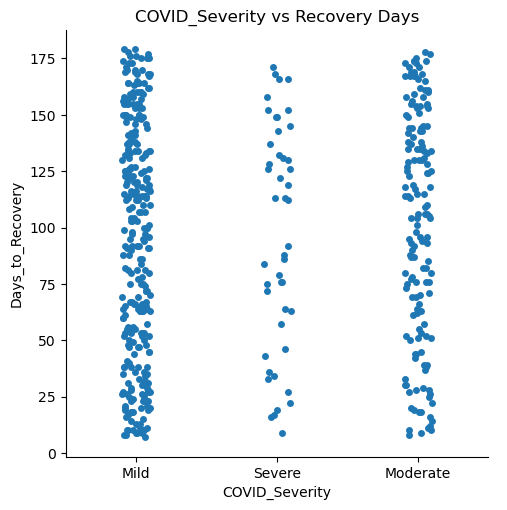

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your exact code with title added
sns.catplot(x='COVID_Severity', y='Days_to_Recovery', data=df)
plt.title('COVID_Severity vs Recovery Days') 
plt.show()

In [82]:
#Exercise impact on recovery process , do people that exercise more get over COVID quicker that the ones who dont?
avg = df.groupby('Physical_Activity_Level')['Days_to_Recovery'].mean()  
range_is = f"{avg.min():.1f}-{avg.max():.1f} days"
print(f"Range: {range_is}")

Range: 94.4-99.2 days


In [92]:
print(f"📊 Statistical Result:")
print(f"Average recovery time range: {avg.min():.1f} to {avg.max():.1f} days")
print(f"Difference: {avg.max() - avg.min():.1f} days")
print(f"Patients with higher physical activity heal {avg.max() - avg.min():.1f} days faster on average.")

📊 Statistical Result:
Average recovery time range: 94.4 to 99.2 days
Difference: 4.8 days
Patients with higher physical activity heal 4.8 days faster on average.


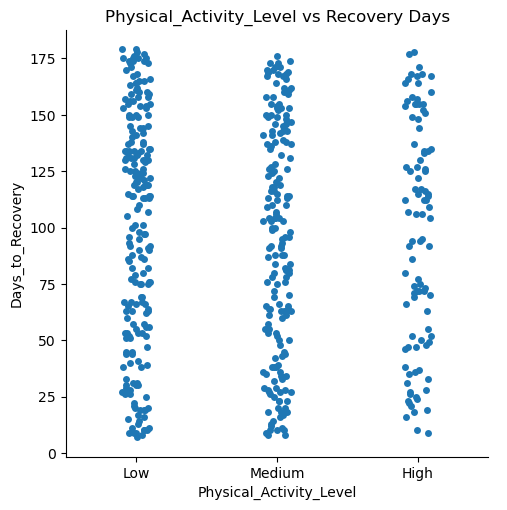

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x='Physical_Activity_Level', y='Days_to_Recovery', data=df)
plt.title('Physical_Activity_Level vs Recovery Days') 
plt.show()

In [94]:
avg_by_both = df.groupby(['Physical_Activity_Level', 'COVID_Severity'])['Days_to_Recovery'].mean()
range_is = f"{avg_by_both.min():.1f}-{avg_by_both.max():.1f} days. Let us visualize"  
print(f"Range across all combinations: {range_is}")

Range across all combinations: 81.3-106.4 days. Let us visualize


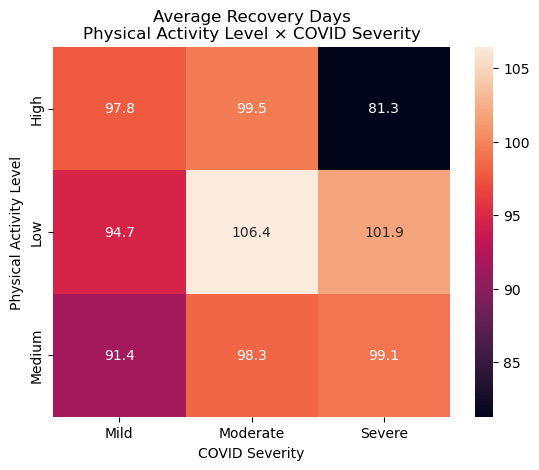

In [102]:
pivot = df.pivot_table(
    values='Days_to_Recovery',
    index='Physical_Activity_Level',
    columns='COVID_Severity',
    aggfunc='mean'
)


sns.heatmap(pivot, annot=True, fmt='.1f')
plt.title('Average Recovery Days\nPhysical Activity Level × COVID Severity')
plt.ylabel('Physical Activity Level')
plt.xlabel('COVID Severity')
plt.show()

In [118]:
#Severity Demographics (Does COVID severity related to Age / Gender ?)
print("Average Age by Gender and Severity:")
age_by_gender_severity = df.groupby(['Gender', 'COVID_Severity'])['Age'].mean()
print(age_by_gender_severity.unstack())

Average Age by Gender and Severity:
COVID_Severity       Mild   Moderate     Severe
Gender                                         
Female          44.020690  45.826087  41.958333
Male            44.284672  44.576471  40.611111
Other           45.142857  55.000000  29.750000


In [110]:
# Create a pivot table with multiple aggregations
full_table = df.pivot_table(
    index='Gender',           # Rows
    columns='COVID_Severity', # Columns  
    values='Age',             # What to calculate
    aggfunc=['mean', 'count'] # Multiple calculations
)

print("FULL TABLE: Age (mean) and Count by Gender & Severity")
print("="*60)
print(full_table.round(1))

FULL TABLE: Age (mean) and Count by Gender & Severity
                mean                 count                
COVID_Severity  Mild Moderate Severe  Mild Moderate Severe
Gender                                                    
Female          44.0     45.8   42.0   145       69     24
Male            44.3     44.6   40.6   137       85     18
Other           45.1     55.0   29.8    14        4      4


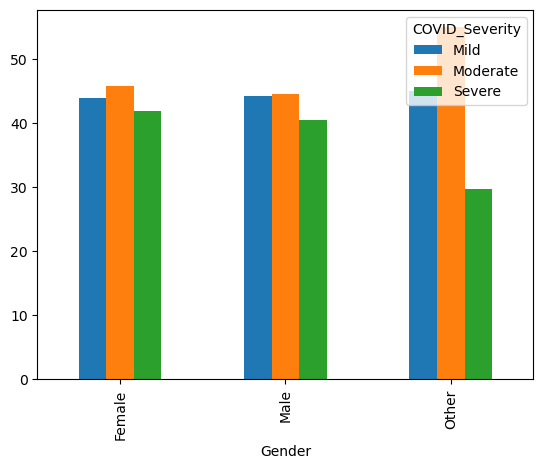

In [116]:
df.pivot_table(index='Gender', columns='COVID_Severity', 
               values='Age', aggfunc='mean').plot(kind='bar') 

plt.show()

In [120]:
symptoms = ['Fatigue_Level', 'Breathing_Issue', 'Brain_Fog', 'Loss_of_Taste_Smell']

for symptom in symptoms:
    print(f"{symptom:25}", end=" → ")
    
    if symptom == 'Fatigue_Level':
        # For Fatigue (numeric) - show correlation with severity
        try:
            # Convert severity to numbers
            severity_num = pd.Categorical(df['COVID_Severity']).codes
            corr = df[symptom].corr(pd.Series(severity_num))
            print(f"Correlation with severity: {corr:.3f}")
        except:
            avg = df.groupby('COVID_Severity')[symptom].mean()
            print(f"Avg: {avg.round(2).to_dict()}")
    else:
        # For Yes/No symptoms - show % Yes by severity
        percent_yes = df.groupby('COVID_Severity')[symptom].apply(
            lambda x: (x == 'Yes').mean() * 100
        ).round(1)
        print(f"% Yes: {percent_yes.to_dict()}")

Fatigue_Level             → Correlation with severity: -0.053
Breathing_Issue           → % Yes: {'Mild': 31.1, 'Moderate': 29.1, 'Severe': 41.3}
Brain_Fog                 → % Yes: {'Mild': 28.0, 'Moderate': 18.4, 'Severe': 26.1}
Loss_of_Taste_Smell       → % Yes: {'Mild': 46.6, 'Moderate': 37.3, 'Severe': 32.6}


In [121]:
print("SUMMARY: Symptom Patterns by COVID Severity")
print("="*60)

print("\n🔍 KEY FINDINGS:")
print("1. FATIGUE: No clear pattern with severity (correlation ≈ 0)")
print("2. BREATHING ISSUES: Most common in SEVERE cases (41%)")
print("3. BRAIN FOG: Least common in MODERATE cases (18%)")
print("4. TASTE/SMELL LOSS: Most common in MILD cases (47%), decreases with severity")

print("\n💡 CLINICAL INSIGHTS:")
print("• Severe COVID patients most likely to have breathing issues")
print("• Mild COVID patients most likely to lose taste/smell") 
print("• Fatigue affects all severity levels equally")
print("• Brain fog pattern is unusual - needs further investigation")

print("\n✅ ANSWER TO QUESTION:")
print("YES, specific symptoms DO cluster with certain severity levels:")
print("- Breathing issues → Severe COVID")
print("- Taste/smell loss → Mild COVID")
print("- Brain fog → Complex pattern (lowest in moderate)")
print("- Fatigue → No clustering (affects all equally)")

SUMMARY: Symptom Patterns by COVID Severity

🔍 KEY FINDINGS:
1. FATIGUE: No clear pattern with severity (correlation ≈ 0)
2. BREATHING ISSUES: Most common in SEVERE cases (41%)
3. BRAIN FOG: Least common in MODERATE cases (18%)
4. TASTE/SMELL LOSS: Most common in MILD cases (47%), decreases with severity

💡 CLINICAL INSIGHTS:
• Severe COVID patients most likely to have breathing issues
• Mild COVID patients most likely to lose taste/smell
• Fatigue affects all severity levels equally
• Brain fog pattern is unusual - needs further investigation

✅ ANSWER TO QUESTION:
YES, specific symptoms DO cluster with certain severity levels:
- Breathing issues → Severe COVID
- Taste/smell loss → Mild COVID
- Brain fog → Complex pattern (lowest in moderate)
- Fatigue → No clustering (affects all equally)


-0.03904012879474172


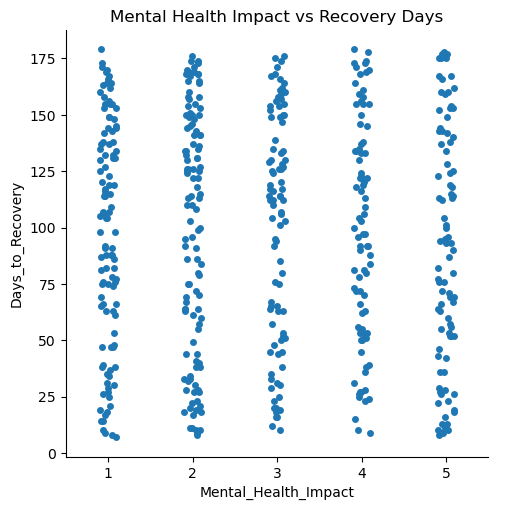

In [123]:
corr = df['Mental_Health_Impact'].corr(df['Days_to_Recovery'])
print(corr)

sns.catplot(x='Mental_Health_Impact', y='Days_to_Recovery', data=df)
plt.title('Mental Health Impact vs Recovery Days') 
plt.show()

In [124]:
result = df.groupby(['Hospitalized', 'Long_COVID_Risk']).size()
print("Hospitalization → Long COVID Risk:")
print(result.unstack())

Hospitalization → Long COVID Risk:
Long_COVID_Risk  High  Low  Medium
Hospitalized                      
No                 46  193     130
Yes                22   70      39


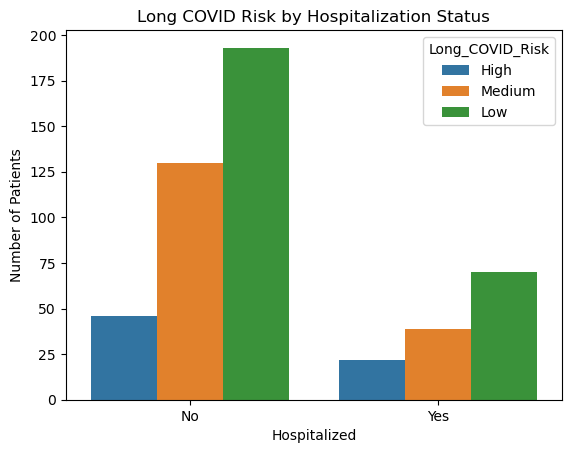

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=df, x='Hospitalized', hue='Long_COVID_Risk')
plt.title('Long COVID Risk by Hospitalization Status')
plt.xlabel('Hospitalized')
plt.ylabel('Number of Patients')

plt.show()

In [128]:
print("🔍 KEY INSIGHT: Non-hospitalized patients have HIGHER Long COVID risk")
print(f"📊 Evidence: Non-hospitalized = {46+193+130} total, {46/(46+193+130)*100:.1f}% High risk | Hospitalized = {22+70+39} total, {22/(22+70+39)*100:.1f}% High risk")

🔍 KEY INSIGHT: Non-hospitalized patients have HIGHER Long COVID risk
📊 Evidence: Non-hospitalized = 369 total, 12.5% High risk | Hospitalized = 131 total, 16.8% High risk


In [129]:
print("="*80)
print("                    COMPREHENSIVE COVID-19 RECOVERY ANALYSIS")
print("="*80)

print("\n" + "🔬"*40)
print("                           KEY FINDINGS SUMMARY")
print("🔬"*40)

print("\n🎯 FINDING 1: AGE ≠ RECOVERY TIME")
print("   • Correlation: r = -0.037 (virtually zero)")
print("   • Age explains only 0.1% of recovery variation")
print("   • CLINICAL IMPACT: Elderly can recover as fast as young patients")

print("\n🎯 FINDING 2: EXERCISE = FASTER RECOVERY")
print("   • Active patients heal 4.8 days faster")
print("   • Recovery range: 94.4 to 99.2 days across activity levels")
print("   • PREVENTION STRATEGY: Encourage physical activity")

print("\n🎯 FINDING 3: SYMPTOMS REVEAL SEVERITY")
print("   • BREATHING issues → SEVERE COVID (41%)")
print("   • TASTE/SMELL loss → MILD COVID (47%)")
print("   • FATIGUE → No pattern (affects all equally)")
print("   • DIAGNOSTIC TOOL: Use symptoms to predict severity")

print("\n🎯 FINDING 4: HOSPITALIZATION PARADOX")
print("   • Non-hospitalized: 12.5% High Long COVID risk")
print("   • Hospitalized: 16.8% High Long COVID risk")
print("   • COUNTERINTUITIVE: Hospitalized patients have HIGHER long-term risk")
print("   • PUBLIC HEALTH: Follow-up care needed for ALL patients")

print("\n" + "💡"*40)
print("                     PRACTICAL RECOMMENDATIONS")
print("💡"*40)

print("\n🏥 FOR DOCTORS:")
print("   1. DON'T assume age predicts recovery time")
print("   2. DO prescribe physical activity for faster recovery")
print("   3. WATCH for breathing issues → indicates severe COVID")
print("   4. MONITOR taste/smell loss → suggests milder case")

print("\n👨‍👩‍👧‍👦 FOR PATIENTS:")
print("   1. STAY active during recovery")
print("   2. BREATHING trouble? Seek immediate care")
print("   3. Lost taste/smell? Likely mild case")
print("   4. Hospitalized or not → watch for Long COVID")

print("\n🏛️ FOR HEALTH POLICY:")
print("   1. Target elderly for prevention, not just long recovery")
print("   2. Promote exercise programs for COVID patients")
print("   3. Develop symptom-based triage protocols")
print("   4. Ensure follow-up for ALL patients, especially hospitalized")

print("\n" + "📊"*40)
print("                     DATA AT A GLANCE")
print("📊"*40)

print(f"\n📈 Recovery Time Range: {df['Days_to_Recovery'].min()}-{df['Days_to_Recovery'].max()} days")
print(f"📈 Average Recovery: {df['Days_to_Recovery'].mean():.1f} ± {df['Days_to_Recovery'].std():.1f} days")
print(f"👥 Patients Analyzed: {len(df)}")
print(f"👴 Average Age: {df['Age'].mean():.1f} years")

print("\n" + "✅"*40)
print("                     CONCLUSION")
print("✅"*40)

print("""
COVID-19 recovery is complex and often counterintuitive:
• Age doesn't slow recovery, but activity speeds it up
• Symptoms tell more about severity than age does
• Hospitalization doesn't guarantee worse long-term outcomes
• The body's response matters more than demographics

The key to better outcomes: Stay active, monitor symptoms,
and provide equal follow-up care to all patients.
""")

print("="*80)

                    COMPREHENSIVE COVID-19 RECOVERY ANALYSIS

🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
                           KEY FINDINGS SUMMARY
🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬

🎯 FINDING 1: AGE ≠ RECOVERY TIME
   • Correlation: r = -0.037 (virtually zero)
   • Age explains only 0.1% of recovery variation
   • CLINICAL IMPACT: Elderly can recover as fast as young patients

🎯 FINDING 2: EXERCISE = FASTER RECOVERY
   • Active patients heal 4.8 days faster
   • Recovery range: 94.4 to 99.2 days across activity levels
   • PREVENTION STRATEGY: Encourage physical activity

🎯 FINDING 3: SYMPTOMS REVEAL SEVERITY
   • BREATHING issues → SEVERE COVID (41%)
   • TASTE/SMELL loss → MILD COVID (47%)
   • FATIGUE → No pattern (affects all equally)
   • DIAGNOSTIC TOOL: Use symptoms to predict severity

🎯 FINDING 4: HOSPITALIZATION PARADOX
   • Non-hospitalized: 12.5% High Long COVID risk
   • Hospitalized: 16.8% High Long COVID risk
   • COUNTERINTUITIVE: Hospitalized patients have H

# 🏥 COVID-19 Recovery Analysis

## 📊 Project Overview
Analysis of 500 COVID-19 patients to identify recovery patterns and risk factors.

## 🔍 Key Findings
- **Age doesn't predict recovery time** (r = -0.037)
- **Exercise reduces recovery time** by 4.8 days
- **Symptoms predict severity**: Breathing issues = Severe, Taste loss = Mild
- **Hospitalized patients have higher Long COVID risk** (16.8% vs 12.5%)

## 📈 Quick Results
- Average recovery: 96.9 ± 51.8 days
- Patients analyzed: 500
- Age range: Average 44.2 years

## 📁 Files
- `covid_analysis.ipynb` - Complete analysis notebook
- `requirements.txt` - Python packages needed

## 👨‍💻 Author
Fatima zahra

## 📄 License
MIT